In this tutorial, we will demonstrate how to create a simple simulation of a 1e diffusion-controlled reaction.

We will first set up and discuss the constants ElectroKitty needs to run a simulation.
Next, we will create a potential program to run the simulation and finally execute a simulation.

What we learn here will then be used in further tutorials to simulate different mechanisms and finally fit data.

We first import some libraries that we will need throughout the tutorials.
In this case we need numpy and matplotlib.
Notice below that from the electrokitty library we are only importing the ElectroKitty class. 
While importing other classes is possible it is for the most part not neccessary as through the base class we can access everythig.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from electrokitty import ElectroKitty

# General comments on simulation

To simulate with electrokitty we first need to define the mechanism that we are trying to simulate.
Since this a basic tutorial we will not concern ourselves with how to correctly define the mechanism just yet. 
We will deal with this in a later tutorial.

Next, we need to define our constants. To fully describe a 1e outer-sphere reaction we need 2 diffusion constants (one for each species in m^2/s), 
three kinetic parameters for the Butler-Volmer equation at the boundary ($\alpha$ [/], $k_{0}$ [m/s], $E^{0'}$ [V]), the initial concentrations [mol/m^3] and constants related to the cell (T [K], $R_{u}$ [$Omega$], $C_{dl}$ [F], A [m^2]).

We define all kinetic parameters in a list of lists. Each step of the mechanism needs its own list of constants. For an electrochemical step we always need 3, for chemical steps we need either 2 or 1, depending on how it is defined. For now let it suffice that we just need a list containing a list with 3 constants. For electrochemical steps we always define it in the order of $\alpha$ [/], $k_{0}$ usually [m/s] or [1/s], $E^{0'}$ [V]. 

Next we need to define our diffusion constants for all dissolved species. The diffusion constants need to be order the same way the species appear in the mechanism list. In this case the first constant corresponds to species "a" and the second to "b". In case that the same species appears in the mechanism multiple times it is important that the diffusion constant list is sorted properly.

The third is the list containing a list of initial concentrations. The first list is associated with adsorbed species, we will leave it empty. The second list includes the initial concentrations of dissolved species in mol/m^3. As with diffusion constant list, again we must correctly sort the initial concentrations for the species as they appear in the mechanism. 

Electrokitty also requires that we define the "spatial constans". These are used to generate the grid on which we solve the diffusion equation. 
We must define the fraction of the total length of the grid at which the first point is located, as such this number must be between 0 and 1, and usually a smaller number improves accuracy of the simulation. Next we need to define the number of spatial points in our grid, 20 is usually more than sufficient. The final 2 parameters are the solution viscosity [m^2/s] and rotational frequency [Hz]. 

For the cell constants we need to input the cell temperature (T [K]), the uncompensated resistance ($R_{u}$ [$Omega$]), the double-layer capacitance ( $C_{dl}$ [F]) and the area of our electrode (A [m^2]). These are all given in one list in the order listed.

The final array we will leave empty, as we do not have any adsorbed species. This list will become important in later tutorials when we deal with adsorbtion non-idealeties. 

In [31]:
mechanism = "E(1): a = b" # mechanism declaration, here a is reduced into b

kinetic_constants = [[0.5, 10, 0.0]] # A list contaning a list of constants in the order: alpha [/], k0 [m/s], E0 [V]

Diffusion_constants=[10**-9, 10**-9] # The diffusion constats the first is for a, the second for b [m^2/s]

initial_condition = [[], [1,0]] # The first list for adsorbed species in mol/m^2, the second for dissolved [mol/m^3] 

spatial_information = [0.001, 20, 10**-5, 0] # constant for grid generation and calculating solution velocities for the RDE electrode
# the fraction of the initial step, the number of points for the simulation, solution viscosity [m^2/s] and rotational frequency [Hz]

cell_constants = [293, 0, 0, 0.283*10**-4] # the cell constants: temperature [K], uncompensated resistance [ohm], double-layer capacitance [F], electrode area[m^2]

iso = [] # we leave it alone



With the mechanism and constants defined, we must next define the potential program for our simulation. In this tutorial we will simulate a simple CV.
For this we will need to pass to electrokitty the initial potential, switching potential, scan rate and the number of points we would like to simulate. We define them below. All potentials are given in V the scan rate given in V/s.

In [32]:
Ei = 0.5 # initial potential
E_switch = -0.5 # the switching potential
scan_rate = 0.1 # the scan rate
nt = 1000 # the number of points to evaluate the CV to

With our simulation now fully defined, we just need to make the right calls to the ElectroKitty class. 

We begin by creating our simulation instance. As ElectroKitty is an object we must first create the class instance. When the class is first created we must pass it the mechanism. The class will read the mechanism and "create" the differential equations it needs to simulate the given mechanism. We must then just pass it the values of the constants for it to solve them.

In [33]:
simulation = ElectroKitty(mechanism) #we create our class instance

Next, we need to create the potential program of our simulation. ElectroKitty has a function that generates the potential program for the simulation. It is important that we create a potential program before we create a simulation. 

Notice that in the function call we passed 2 zeros. The first parameter is the amplitude and the second the frequency of a sinusoid that is superimposed onto the potential ramp. As we are currently not trying to simulate any kind of ACV we must set both to 0.

In [37]:
_ = simulation.V_potencial(Ei, E_switch, scan_rate, 0, 0, nt)

Next we need to pass the simulation constants to ElectroKitty so that it can create a simulation for it to solve.

In [35]:
simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition) # passing the lists in the correct order

Now we just need to order ElectroKitty to solve the equations for us. Let us also plot the results with the Plot_simulation function. 
We can access the results by directly accessing them from the class.

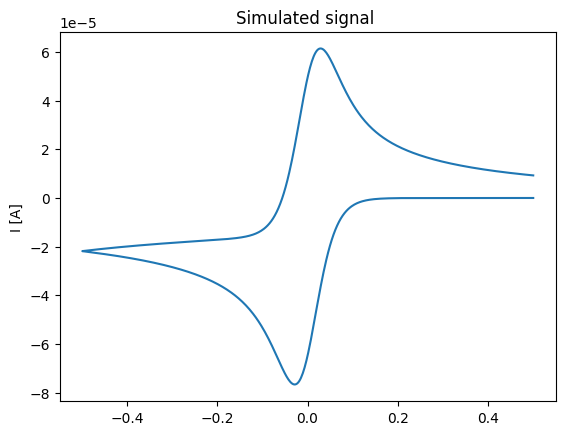

In [36]:
simulation.simulate()
simulation.Plot_simulation()

Since we imported the matplotlib library let us also see the potential program and the depandance of the current on time. We must do this by directly accessing the array in the class.

First we plot the generated potential ramp. The time array is stored in ElectroKitty's t array, and the potential in the E_generated array.

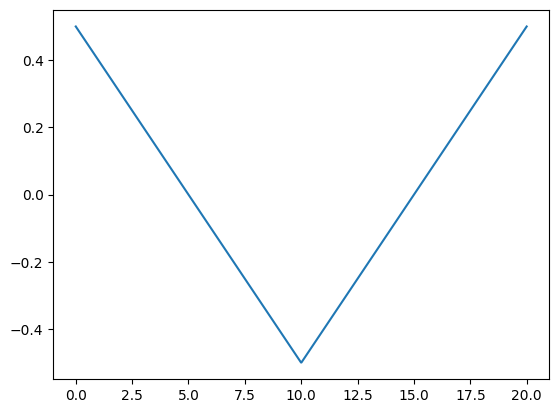

In [23]:
plt.plot(simulation.t, simulation.E_generated)

For the current vs. time plot we must access the simulated current, which is stored in the current array. The plot looks like this.

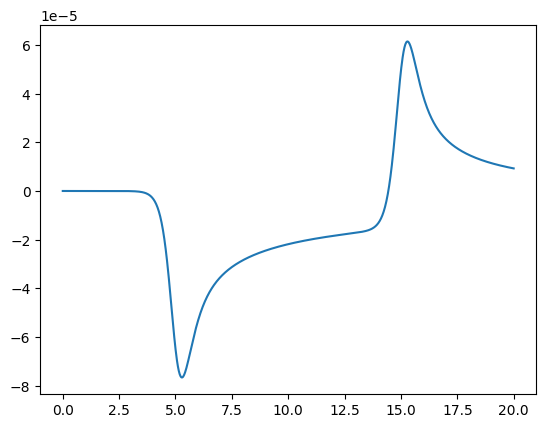

In [24]:
plt.plot(simulation.t, simulation.current)

Finally it can be intersting to see the concentration profile of our species. During the simulation ElectroKitty stores the concentration profile. It is easily viewed by calling the Plot_concentration_profile method, this will plot the concentration with respect to time and distance from the electrode. The method has an optional parameter species_num. This parameter determines which species concentration is to be ploted. By default it is set to 0, meaning it will show the first species in the mechanism. In our current example 0 corresponds to a and 1 corresponds to b. 

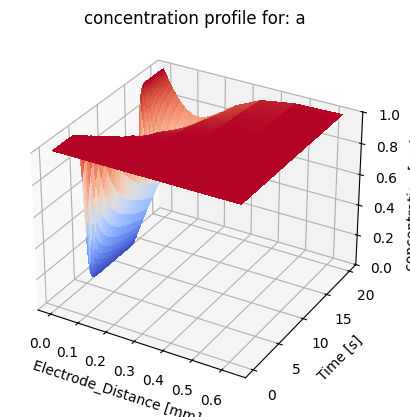

In [29]:
simulation.Plot_concentration_profile(species_num = 0) # plotting the concentration profile of a

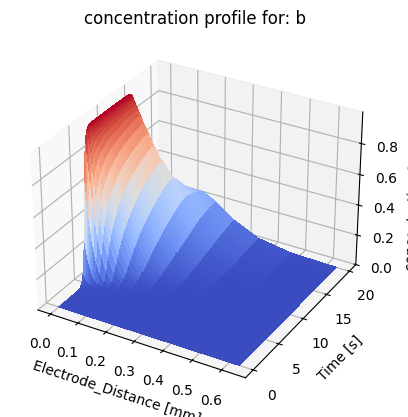

In [26]:
simulation.Plot_concentration_profile(species_num = 1) # plotting the concentration profile of b

# Simulating the capacitive current and IR drop

Now that we have simulated a simple reaction, let us introduce capacitance and uncompensated resistance to our simulation.

This is easily done, as all we have to do now is change the values in our cell_constants list and run the simulation again.
The code to this looks something like this:

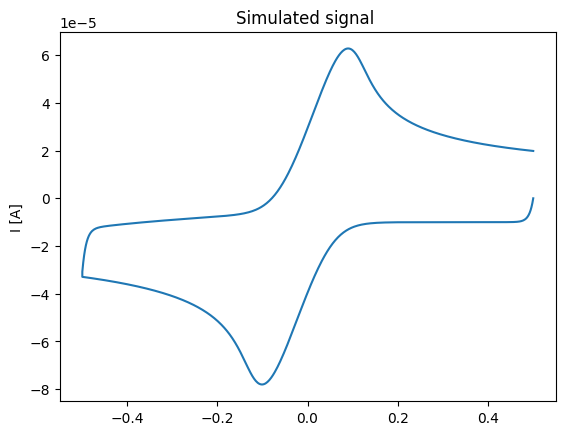

In [45]:
mechanism = "E(1): a = b" 

kinetic_constants = [[0.5, 10, 0.0]] 

Diffusion_constants=[10**-9, 10**-9] 

initial_condition = [[], [1,0]] 

spatial_information = [0.001, 20, 10**-5, 0] 

# Here we are inly changing the values of Ru and capacitance

cell_constants = [293, 750, 10**-4, 0.283*10**-4] # Temperature [K]. Ru [Ohm], Cdl [F], Area [m^2]

iso = [] 

simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition)
simulation.simulate()
simulation.Plot_simulation()

# Simulating rotation

Simulating a RDE electrode is easy in Electrokitty. As before, we just need to change one parameter and the program will do the rest. You should be cautious though when simulating with convection. The issue can come about that your grid is not "fine" enough for convection, leading to inaccuracies. This is easily fixed by either lowering the initial point percentage or increasing the number of spatial points, ideally both, but this can slow down the simulation significantly. 

Again let us just remedy our lists and run a quick simulation:

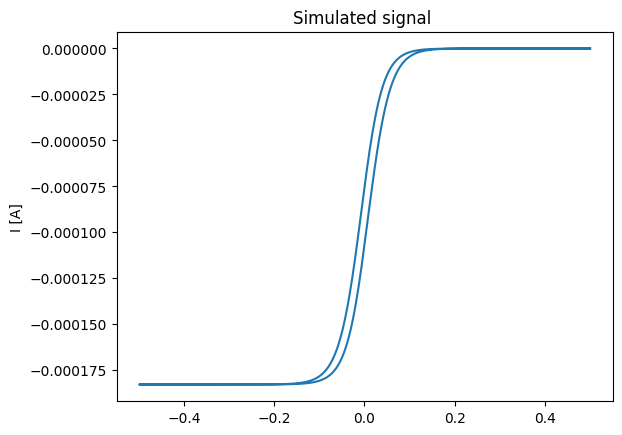

In [51]:
mechanism = "E(1): a = b" 

kinetic_constants = [[0.5, 10, 0.0]] 

Diffusion_constants=[10**-9, 10**-9] 

initial_condition = [[], [1,0]] 

# We decrese the initial fraction to increase simulation accuracy, while now we have a rotation of 30 Hz

spatial_information = [0.0001, 20, 10**-5, 40] # initial fraction, number of points, viscosity [m^2/s] and rotation [Hz]

cell_constants = [293, 0, 0, 0.283*10**-4] 

iso = [] 

simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition)
simulation.simulate()
simulation.Plot_simulation()

With this we conclude a very basic tutorial. Next we will demonstrate how to simulate adsorption and surface-confined reactions.